<a href="https://colab.research.google.com/github/pawarharshit/tensorflow_programs/blob/master/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
test_data,train_data = tfds.load('tf_flowers',with_info=True,split=['train[:10%]','train[10%:25%]','train[25%:]'],
                                            as_supervised=True)

In [0]:
dataset,info = tfds.load('tf_flowers',with_info=True,split=['train[:10%]','train[10%:25%]','train[25%:]'],
                                            as_supervised=True)

In [0]:
test_data,valid_data,train_data = dataset

In [14]:
test_data

<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [0]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names 
n_classes = info.features["label"].num_classes

In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image)
    return final_image, label


In [0]:
batch_size = 32
train_data = train_data.shuffle(1000)
train_data = train_data.map(preprocess).batch(batch_size).prefetch(1)
valid_data = valid_data.map(preprocess).batch(batch_size).prefetch(1)
test_data = test_data.map(preprocess).batch(batch_size).prefetch(1)


In [18]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",include_top=False)

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes,activation="softmax")(avg)
model = tf.keras.Model(inputs = base_model.input,outputs=output)

In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
optimizer = tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
86/86 [==============================] - 17s 199ms/step - loss: 1.7587 - accuracy: 0.7798 - val_loss: 1.7340 - val_accuracy: 0.7931
Epoch 2/5
86/86 [==============================] - 16s 185ms/step - loss: 0.4609 - accuracy: 0.9157 - val_loss: 0.8495 - val_accuracy: 0.8603
Epoch 3/5
86/86 [==============================] - 15s 178ms/step - loss: 0.2176 - accuracy: 0.9499 - val_loss: 0.7614 - val_accuracy: 0.8639
Epoch 4/5
86/86 [==============================] - 15s 175ms/step - loss: 0.1264 - accuracy: 0.9648 - val_loss: 0.6642 - val_accuracy: 0.8766
Epoch 5/5
86/86 [==============================] - 15s 176ms/step - loss: 0.0860 - accuracy: 0.9724 - val_loss: 0.6905 - val_accuracy: 0.8711


In [0]:
for layer in base_model.layers:
    layer.trainable = True

In [29]:
optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history2 = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
86/86 [==============================] - 58s 669ms/step - loss: 0.4198 - accuracy: 0.8612 - val_loss: 0.4392 - val_accuracy: 0.8929
Epoch 2/5
86/86 [==============================] - 57s 663ms/step - loss: 0.0765 - accuracy: 0.9764 - val_loss: 0.5578 - val_accuracy: 0.8566
Epoch 3/5
86/86 [==============================] - 57s 661ms/step - loss: 0.0374 - accuracy: 0.9876 - val_loss: 0.3535 - val_accuracy: 0.9056
Epoch 4/5
86/86 [==============================] - 57s 662ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.3539 - val_accuracy: 0.9038
Epoch 5/5
86/86 [==============================] - 57s 660ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.3281 - val_accuracy: 0.9074


In [30]:
model.evaluate(test_data)

12/12 [==============================] - 2s 188ms/step - loss: 0.3110 - accuracy: 0.9455


[0.31098422408103943, 0.9455040693283081]

In [0]:
for img,label in test_data.take(1):
    img = img[0]
    label = label[0]
    break

In [36]:
img.shape

TensorShape([224, 224, 3])

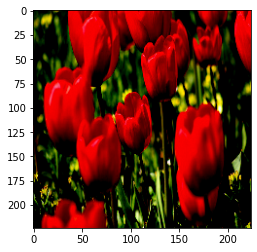

In [37]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [40]:
class_names[label]

'tulips'